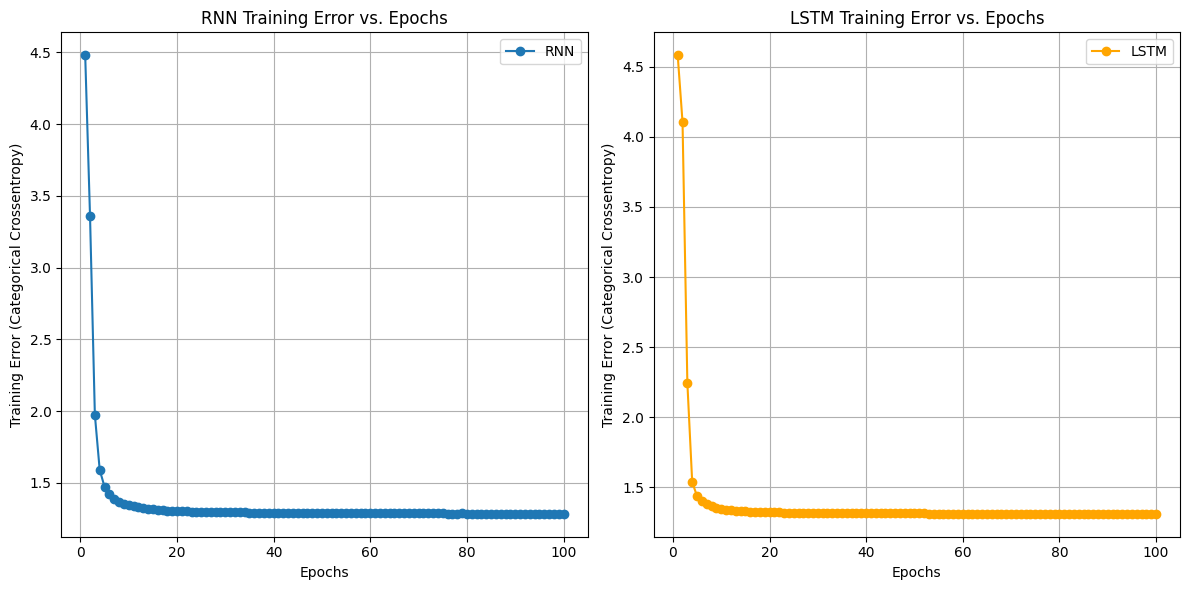

94/94 [==============================] - 0s 3ms/step
Trial 1 (RNN): Wrong Predictions = 1146
Trial 1 (LSTM): Wrong Predictions = 17
94/94 [==============================] - 0s 4ms/step
Trial 2 (RNN): Wrong Predictions = 1119
Trial 2 (LSTM): Wrong Predictions = 19
94/94 [==============================] - 0s 3ms/step
Trial 3 (RNN): Wrong Predictions = 1105
Trial 3 (LSTM): Wrong Predictions = 14
94/94 [==============================] - 0s 3ms/step
Trial 4 (RNN): Wrong Predictions = 1104
Trial 4 (LSTM): Wrong Predictions = 16
94/94 [==============================] - 0s 3ms/step
Trial 5 (RNN): Wrong Predictions = 1134
Trial 5 (LSTM): Wrong Predictions = 12
94/94 [==============================] - 0s 4ms/step
Trial 6 (RNN): Wrong Predictions = 1136
Trial 6 (LSTM): Wrong Predictions = 19
94/94 [==============================] - 0s 3ms/step
Trial 7 (RNN): Wrong Predictions = 1109
Trial 7 (LSTM): Wrong Predictions = 18
94/94 [==============================] - 0s 4ms/step
Trial 8 (RNN): Wrong Pr

In [43]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

def custom_weight_initializer(shape, dtype=None):
    return tf.keras.backend.random_uniform(shape, minval=-0.2, maxval=0.2, dtype=dtype)

def generate_sequences(num_sequences, p):
    sequences = np.zeros((num_sequences, p + 1, p + 1), dtype=int)
    x = np.zeros(p + 1, dtype=int)
    x[p] = 1
    y = np.zeros(p + 1, dtype=int)
    y[p] = 1

    for i in range(num_sequences):
        subseq_length = p - 1
        start_with_x = random.choice([True, False])
        indices = np.random.randint(0, p, size=subseq_length)
        indices.sort()  # Sort the indices
        subsequence = np.eye(p + 1, dtype=int)[indices]

        # Construct the training sequence
        if start_with_x:
            training_sequence = np.concatenate(([x], subsequence, [x]))
        else:
            training_sequence = np.concatenate(([y], subsequence, [y]))

        sequences[i] = training_sequence

    return sequences

def custom_weight_initializer(shape, dtype=None):
    return tf.random.uniform(shape, minval=-0.2, maxval=0.2, dtype=dtype)

def create_rnn_model(p):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(128, activation='sigmoid', return_sequences=True, input_shape=(p + 1, p + 1),kernel_initializer=custom_weight_initializer))
    model.add(tf.keras.layers.Dense(p + 1, activation='softmax'))
    return model

def create_lstm_model(p):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Lambda(lambda x: x, input_shape=(p + 1, p + 1)))
    model.add(tf.keras.layers.Dense(p + 1, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(p + 1, activation='sigmoid'))
    
    for layer in model.layers:
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.2, maxval=0.2)
    
    model.add(tf.keras.layers.Dense(p + 1, activation='softmax')) 
    
    return model

def evaluate_model(model, test_X):
    predictions = model.predict(test_X)
    max_values = predictions.max(axis=2)
    max_predictions = (predictions == max_values[..., np.newaxis]).astype(int)
    num_correct = np.all((max_predictions[:, -2, :] == test_X[:, -1, :]), axis=1)
    num_wrong = len(test_X) - np.sum(num_correct)
    return num_wrong

# p = 100
# num_trials = 10
# epochs = 100

# num_sequences_values = [10, 20, 30, 40, 50, 100, 1000, 2000,3000]
# rnn_training_errors = []
# lstm_training_errors = []

# Rnn_model = create_rnn_model(p)
# Lstm_model = create_lstm_model(p)

# for num_sequences in num_sequences_values:
#     X = generate_sequences(num_sequences, p)
#     Y = np.roll(X, shift=-1, axis=1).astype(np.float32)
    
#     Rnn_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy())
#     rnn_history = Rnn_model.fit(X, Y, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
    
#     final_rnn_training_error = rnn_history.history['loss'][-1]
#     rnn_training_errors.append(final_rnn_training_error)
    
#     Lstm_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy())
#     lstm_history = Lstm_model.fit(X, Y, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

#     final_lstm_training_error = lstm_history.history['loss'][-1]
#     lstm_training_errors.append(final_lstm_training_error)

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(num_sequences_values, rnn_training_errors, marker='o', label='RNN')
# plt.xlabel('Number of Sequences')
# plt.ylabel('Final Training Error (MAE)')
# plt.title('RNN Training Error vs. Number of Sequences')
# plt.grid(True)
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(num_sequences_values, lstm_training_errors, marker='o', label='LSTM', color='orange')
# plt.xlabel('Number of Sequences')
# plt.ylabel('Final Training Error (MAE)')
# plt.title('LSTM Training Error vs. Number of Sequences')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()

p = 100
num_trials = 10
epochs = 100
num_sequences = 3000  # Fixed number of sequences

Rnn_model = create_rnn_model(p)
Lstm_model = create_lstm_model(p)

X = generate_sequences(num_sequences, p)
Y = np.roll(X, shift=-1, axis=1).astype(np.float32)

Rnn_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy())
Lstm_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy())

rnn_history = Rnn_model.fit(X, Y, epochs=100, batch_size=16, validation_split=0.2, verbose=0)
lstm_history = Lstm_model.fit(X, Y, epochs=100, batch_size=16, verbose=0)

# rnn_training_errors.append(rnn_history.history['loss'][-1])
# lstm_training_errors.append(lstm_history.history['loss'][-1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1),rnn_history.history['loss'], marker='o', label='RNN')
plt.xlabel('Epochs')
plt.ylabel('Training Error (Categorical Crossentropy)')
plt.title('RNN Training Error vs. Epochs')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1),lstm_history.history['loss'], marker='o', label='LSTM', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Training Error (Categorical Crossentropy)')
plt.title('LSTM Training Error vs. Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

average_wrong_predictions_rnn = 0
average_wrong_predictions_lstm = 0
num_test_sequences = 3000

X = generate_sequences(num_test_sequences, p)
Y = np.roll(X, shift=-1, axis=1).astype(np.float32)

rnn_model = create_rnn_model(p)
rnn_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy())
rnn_history = rnn_model.fit(X, Y, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

lstm_model = create_lstm_model(p)
lstm_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy())
lstm_history = lstm_model.fit(X, Y, epochs=3, batch_size=32, verbose=0)


for trial in range(num_trials):
    test_X = generate_sequences(num_test_sequences, p)

    wrong_predictions_rnn = evaluate_model(rnn_model, test_X)
    wrong_predictions_lstm = evaluate_model(lstm_model, test_X)

    print(f"Trial {trial + 1} (RNN): Wrong Predictions = {wrong_predictions_rnn}")
    print(f"Trial {trial + 1} (LSTM): Wrong Predictions = {wrong_predictions_lstm}")

    average_wrong_predictions_rnn += wrong_predictions_rnn
    average_wrong_predictions_lstm += wrong_predictions_lstm

average_wrong_predictions_rnn /= num_trials
average_wrong_predictions_lstm /= num_trials

print(f"Average Wrong Predictions (RNN) over {num_trials} Trials: {average_wrong_predictions_rnn}")
print(f"Average Wrong Predictions (LSTM) over {num_trials} Trials: {average_wrong_predictions_lstm}")

RNN Architecture:

Utilizes 128 self-recurrent hidden units.
<br>
Includes p + 1 nonrecurrent output units.
<br>
Features connections from all layers below to each layer.

Activation Functions:

The first layer uses the sigmoid activation function, limiting output values to the range [0, 1].
<br>
The output layer employs the softmax activation function.


Optimization and Training:
<br>
The optimizer used for training is Adam.
<br>
All weights in the network are randomly initialized.
<br>
The loss function for training is Categorical Cross Entropy.

<br>
<br>
LSTM Architecture:


There is a memory layer designed to capture and retain information over extended sequences
<br>
There is a input gate layer to regulate the flow of information into the memory layer.
<br>
Finally, there is a output layer.

Activation Functions:

Each layer uses the sigmoid activation function, limiting output values to the range [0, 1].
<br>
The output layer employs the softmax activation function.

Optimization and Training:

The optimizer used for training is Adam.
<br>
All weights in the network are randomly initialized.
<br>
The loss function for training is Categorical Cross Entropy.


Results:
When employing both RNN and LSTM with a brief four-time-step delay (p = 5), the majority of experiments resulted in very few incorrect predictions for RNN and no incorrect predictions for LSTM.
<br>
However, none of the trials yielded successful outcomes when the delay was extended to p = 25.
<br>
In scenarios involving long time lags, only LSTM managed to achieve successful trials. Interestingly, when we experimented by adjusting the number of hidden layers or units, we observed that the accuracy of RNN remained relatively lower compared to LSTM, regardless of whether we increased or decreased these architectural parameters.





